In [1]:
import torch
from torch import (optim, nn)

from torch.utils.data import (
    DataLoader,
    TensorDataset,
    random_split
)

import numpy as np

# User-defined classes
from utils.base import (
    LogisticRegression,
    Trainer
)

# User-defined functions
from utils.preprocess import clusters, onehot

# Plotting
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")
plt.rcParams["font.family"] = "monospace"

In [2]:
# Constants
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DTYPE = torch.float32
BATCH_SIZE = 32
NUM_EPOCHS = 20
SIZE = 100
GENERATOR = torch.Generator().manual_seed(42)

print(f"Device has ben set to: {torch.cuda.get_device_properties(DEVICE).name}")

Device has ben set to: NVIDIA GeForce RTX 4060 Laptop GPU


In [3]:
X, y = clusters(SIZE, means=[(-3, -3), (2, 2), (-2, 2)], stds=[0.8, 0.6, 0.7])

In [4]:
print("Generated X:", X, "\nGenerated y:", y, sep='\n')
print("\nShape of X: ", X.shape, "\nShape of y: ", y.shape, sep='\n')

Generated X:
tensor([[-3.4063, -1.3309],
        [-3.4311, -2.9966],
        [-4.8430, -2.5199],
        [-4.0472, -2.3562],
        [-4.3545, -2.6047],
        [-4.0440, -3.3648],
        [-2.5174, -3.2404],
        [-3.2587, -4.8687],
        [-2.0691, -2.3894],
        [-2.6540, -4.2743],
        [-3.9344, -3.1896],
        [-3.7650, -1.5943],
        [-3.1784, -2.8882],
        [-1.8694, -2.2224],
        [-2.5672, -3.4860],
        [-3.8464, -1.6283],
        [-3.4192, -2.3392],
        [-3.9618, -3.0258],
        [-2.3800, -2.2636],
        [-1.0470, -1.9766],
        [-2.4320, -2.4926],
        [-3.2075, -2.8069],
        [-1.7494, -3.4728],
        [-4.4892, -3.5622],
        [-2.4047, -3.3594],
        [-3.2409, -3.3100],
        [-2.2877, -4.6420],
        [-3.1088, -2.9778],
        [-3.9188, -2.8949],
        [-3.6677, -2.3769],
        [-3.0569, -3.2095],
        [-1.0694, -3.2501],
        [-2.9194, -3.9932],
        [-3.4659, -2.7056],
        [-3.4730, -2.9806],
       

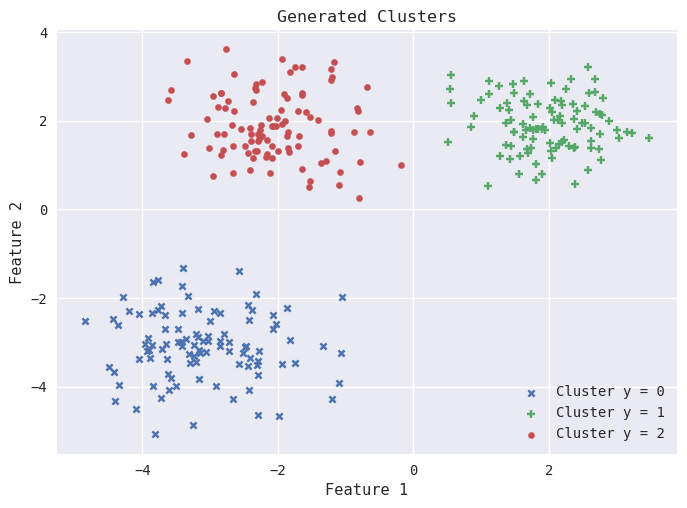

In [5]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='x', label='Cluster y = 0', s=20)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='+', label='Cluster y = 1', s=40)
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], marker='o', label='Cluster y = 2', s=20)
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Clusters')
plt.show()

In [6]:
y_encoded = onehot(y.int(), 3)
print(f"New y (One-Hot Encoded):\n{y_encoded}")

New y (One-Hot Encoded):
tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
       

In [7]:
Model = LogisticRegression(in_dims=2, out_dims=3, multinomial=True).to(DEVICE)

In [8]:
Data = TensorDataset(X, y_encoded)
Data.tensors

(tensor([[-3.4063, -1.3309],
         [-3.4311, -2.9966],
         [-4.8430, -2.5199],
         [-4.0472, -2.3562],
         [-4.3545, -2.6047],
         [-4.0440, -3.3648],
         [-2.5174, -3.2404],
         [-3.2587, -4.8687],
         [-2.0691, -2.3894],
         [-2.6540, -4.2743],
         [-3.9344, -3.1896],
         [-3.7650, -1.5943],
         [-3.1784, -2.8882],
         [-1.8694, -2.2224],
         [-2.5672, -3.4860],
         [-3.8464, -1.6283],
         [-3.4192, -2.3392],
         [-3.9618, -3.0258],
         [-2.3800, -2.2636],
         [-1.0470, -1.9766],
         [-2.4320, -2.4926],
         [-3.2075, -2.8069],
         [-1.7494, -3.4728],
         [-4.4892, -3.5622],
         [-2.4047, -3.3594],
         [-3.2409, -3.3100],
         [-2.2877, -4.6420],
         [-3.1088, -2.9778],
         [-3.9188, -2.8949],
         [-3.6677, -2.3769],
         [-3.0569, -3.2095],
         [-1.0694, -3.2501],
         [-2.9194, -3.9932],
         [-3.4659, -2.7056],
         [-3.4

In [9]:
trainData, valData = random_split(Data, (0.8, 0.2), generator=GENERATOR)

trainLoader = DataLoader(trainData, batch_size=BATCH_SIZE, generator=GENERATOR, shuffle=True)
valLoader = DataLoader(valData, batch_size=BATCH_SIZE, generator=GENERATOR, shuffle=True)

In [10]:
trainer = Trainer(
    Model,
    trainLoader,
    valLoader,
    optimizer=optim.SGD(Model.parameters(), lr=.1),
    criterion=nn.CrossEntropyLoss(reduction='mean'),        # Cross-entropy Loss (For classification)
    device=DEVICE
)

In [11]:
train_loss, val_loss = trainer.train(num_epochs=NUM_EPOCHS)

Epoch 20/20 | Train Loss: 0.5847 | Val Loss: 0.5917: 100%|██████████| 20/20 [00:00<00:00, 73.28it/s]


In [12]:
print("Train Loss:", train_loss, "\nValidation Loss:", val_loss, sep='\n')

Train Loss:
{1: 1.1445747464895248, 2: 1.0509727895259857, 3: 0.9661329388618469, 4: 0.8473747670650482, 5: 0.7300957888364792, 6: 0.6749100983142853, 7: 0.6475339159369469, 8: 0.6335999369621277, 9: 0.6208687201142311, 10: 0.6141565889120102, 11: 0.6096760034561157, 12: 0.6036125048995018, 13: 0.6005314886569977, 14: 0.5995409786701202, 15: 0.5945016145706177, 16: 0.5916691720485687, 17: 0.5904541090130806, 18: 0.5878351852297783, 19: 0.586704321205616, 20: 0.5846884474158287}

Validation Loss:
{1: 1.004771649837494, 2: 0.9240016341209412, 3: 0.8358074128627777, 4: 0.7320860922336578, 5: 0.676396369934082, 6: 0.6495673954486847, 7: 0.6340499222278595, 8: 0.6274733245372772, 9: 0.6198403835296631, 10: 0.6149463951587677, 11: 0.6100090146064758, 12: 0.606771320104599, 13: 0.6040557324886322, 14: 0.6011452972888947, 15: 0.5993131101131439, 16: 0.5967732071876526, 17: 0.595823347568512, 18: 0.5933011770248413, 19: 0.5921063125133514, 20: 0.591682493686676}


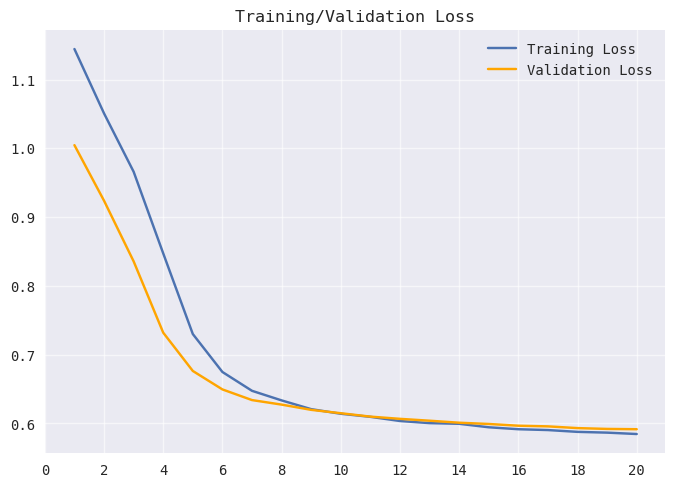

In [13]:
plt.plot(
    train_loss.keys(),
    train_loss.values(),
    label="Training Loss"
);
plt.plot(
    val_loss.keys(),
    val_loss.values(),
    color="orange",
    label="Validation Loss"
);
plt.xticks(np.linspace(0, 20, 11));
plt.grid(True, alpha = .6);
plt.title("Training/Validation Loss");
plt.legend(loc='best');
plt.show()

In [14]:
print(f"Predicted Model Parameters:", "Weights: {}".format(Model.linear.weight), "Bias: {}".format(Model.linear.bias), sep="\n")

Predicted Model Parameters:
Weights: Parameter containing:
tensor([[-0.5537, -1.0268],
        [ 0.9714,  0.5275],
        [-0.9411,  0.7299]], device='cuda:0', requires_grad=True)
Bias: Parameter containing:
tensor([-0.1639,  0.0365, -0.2124], device='cuda:0', requires_grad=True)


In [15]:
print(f"Shapes for Weight and Bias Tensors:", Model.linear.weight.shape, Model.linear.bias.shape, sep="\n")

Shapes for Weight and Bias Tensors:
torch.Size([3, 2])
torch.Size([3])


In [16]:
weights = Model.linear.weight.detach().cpu().numpy()
biases = Model.linear.bias.detach().cpu().numpy()

Xmin, Xmax = X[:, 0].min() - .5, X[:, 0].max() + .5
ymin, ymax = X[:, 1].min() - .5, X[:, 1].max() + .5

In [17]:
xx, yy = np.meshgrid(np.linspace(Xmin, Xmax, SIZE), np.linspace(ymin, ymax, SIZE))
grid = np.c_[xx.flatten(), yy.flatten()]

scores = grid @ weights.T + biases

In [18]:
predicted_classes = np.argmax(scores, axis=1).reshape(xx.shape)

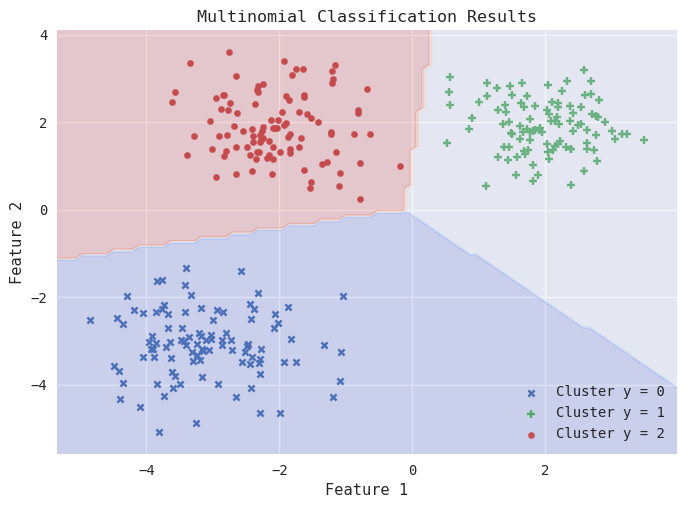

In [19]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='x', label='Cluster y = 0', s=20)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='+', label='Cluster y = 1', s=40)
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], marker='o', label='Cluster y = 2', s=20)

plt.contourf(xx, yy, predicted_classes, alpha=0.2, cmap=plt.cm.coolwarm)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Multinomial Classification Results");
plt.legend(loc='lower right');
plt.show();

In [20]:
# Testing on a New Instance
Xn = torch.tensor([-3.77690, 0.007854], dtype=DTYPE, device='cpu').unsqueeze(0)
print(f"New Instance:", Xn, Xn.shape, sep='\n')

New Instance:
tensor([[-3.7769,  0.0079]])
torch.Size([1, 2])


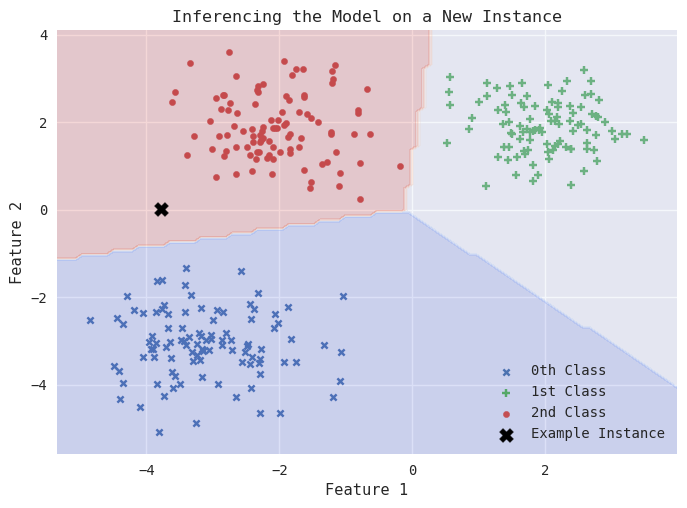

In [21]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='x', label='0th Class', s=20)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='+', label='1st Class', s=40)
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], marker='o', label='2nd Class', s=20)

plt.contourf(xx, yy, predicted_classes, alpha=0.2, cmap=plt.cm.coolwarm)

# New instance
plt.scatter(Xn[:, 0], Xn[:, 1], marker='X', label="Example Instance", s=100, c='black')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Inferencing the Model on a New Instance");
plt.legend(loc='lower right');
plt.show();

In [22]:
yn = Model(Xn.to(DEVICE))
print(f"Resulting predictions:\n{yn}")
print(f"Shape of prediction tensor: {yn.shape}")

Resulting predictions:
tensor([[1.9320e-01, 7.5263e-04, 8.0605e-01]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
Shape of prediction tensor: torch.Size([1, 3])


In [23]:
probs = [f"{prob.item() * 100:.2f}%" for prob in yn.squeeze()]
print("Probabilities:", probs, sep='\n')

Probabilities:
['19.32%', '0.08%', '80.60%']


In [24]:
torch.argmax(yn, dim=1)

tensor([2], device='cuda:0')